# VISUALIZING TEXT DATA USING WORD CLOUDS

Earlier in the course, we used text analytics as a predictive tool, using word frequencies as independent variables in our models. However, sometimes our goal is to understand commonly occurring topics in text data instead of to predict the value of some dependent variable. In such cases, word clouds can be a visually appealing way to display the most frequent words in a body of text.

A word cloud arranges the most common words in some text, using size to indicate the frequency of a word. For instance, this is a word cloud for the complete works of Shakespeare, removing English stopwords:

![](pics/shakespeare.png)

While we could generate word clouds using free generators available on the Internet, we will have more flexibility and control over the process if we do so in R. We will visualize the text of tweets about Apple, a dataset we used earlier in the course. As a reminder, this dataset (which can be downloaded from [tweets.csv](https://d37djvu3ytnwxt.cloudfront.net/asset-v1:MITx+15.071x_3+1T2016+type@asset+block/tweets.csv)) has the following variables:

**Tweet** -- the text of the tweet

**Avg** -- the sentiment of the tweet, as assigned by users of Amazon Mechanical Turk. The score ranges on a scale from -2 to 2, where 2 means highly positive sentiment, -2 means highly negative sentiment, and 0 means neutral sentiment.

# Preparing the Data

Download the dataset "tweets.csv", and load it into a data frame called "tweets" using the `read.csv()` function, remembering to use `stringsAsFactors=FALSE` when loading the data.

Next, perform the following pre-processing tasks (like we did in Unit 5), noting that we don't stem the words in the document or remove sparse terms:

1) Create a corpus using the Tweet variable

2) Convert the corpus to lowercase (don't forget to type "corpus = tm_map(corpus, PlainTextDocument)" in your R console right after this step)

3) Remove punctuation from the corpus

4) Remove all English-language stopwords

5) Build a document-term matrix out of the corpus

6) Convert the document-term matrix to a data frame called allTweets



In [1]:
tweets = read.csv('data/tweets.csv', stringsAsFactors=FALSE)

In [3]:
library(tm)
library(SnowballC)

Loading required package: NLP


In [4]:
corpus = Corpus(VectorSource(tweets$Tweet))

In [5]:
corpus = tm_map(corpus, tolower)
corpus = tm_map(corpus, PlainTextDocument)

In [6]:
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, removeWords, stopwords("english"))

In [7]:
frequencies = DocumentTermMatrix(corpus)
#sparse = removeSparseTerms(frequencies, 0.995)
tweetsSparse = as.data.frame(as.matrix(frequencies))

In [11]:
nrow(tweetsSparse)
ncol(tweetsSparse)

[1] 1181

[1] 3780

How many unique words are there across all the documents?

3780

# Building a Word Cloud

Install and load the "wordcloud" package, which is needed to build word clouds.

As we can read from ?wordcloud, we will need to provide the function with a vector of words and a vector of word frequencies. 

Which function can we apply to allTweets to get a vector of the words in our dataset, which we'll pass as the first argument to wordcloud()?
`colnames`

Which function should we apply to allTweets to obtain the frequency of each word across all tweets?
`colSums`

In [12]:
# install.packages("wordcloud")
library(wordcloud)

Loading required package: RColorBrewer


In [13]:
?wordcloud

wordcloud {wordcloud},R Documentation
words,the words
freq,their frequencies
scale,A vector of length 2 indicating the range of the size of the words.
min.freq,words with frequency below min.freq will not be plotted
max.words,Maximum number of words to be plotted. least frequent terms dropped
random.order,"plot words in random order. If false, they will be plotted in decreasing frequency"
random.color,"choose colors randomly from the colors. If false, the color is chosen based on the frequency"
rot.per,proportion words with 90 degree rotation
colors,color words from least to most frequent
ordered.colors,"if true, then colors are assigned to words in order"


In [15]:
summary(colSums(tweetsSparse))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.000    1.000    1.000    2.826    2.000 1297.000 

Use allTweets to build a word cloud. Make sure to check out the help page for wordcloud if you are not sure how to do this.

Because we are plotting a large number of words, you might get warnings that some of the words could not be fit on the page and were therefore not plotted -- this is especially likely if you are using a smaller screen. You can address these warnings by plotting the words smaller. From ?wordcloud, we can see that the "scale" parameter controls the sizes of the plotted words. By default, the sizes range from 4 for the most frequent words to 0.5 for the least frequent, as denoted by the parameter "scale=c(4, 0.5)". We could obtain a much smaller plot with, for instance, parameter "scale=c(2, 0.25)".

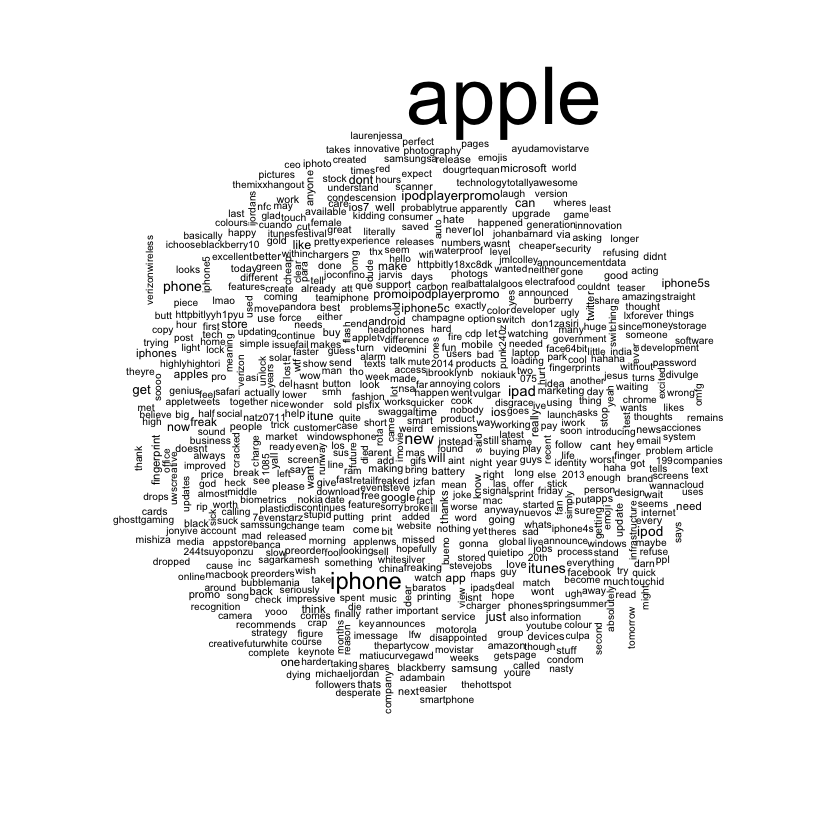

In [16]:
wordcloud(words = colnames(tweetsSparse), 
          freq = colSums(tweetsSparse),
          scale=c(4,.5))

In [18]:
corpus = tm_map(corpus, removeWords, c("apple"))
frequencies = DocumentTermMatrix(corpus)
#sparse = removeSparseTerms(frequencies, 0.995)
tweetsSparse = as.data.frame(as.matrix(frequencies))

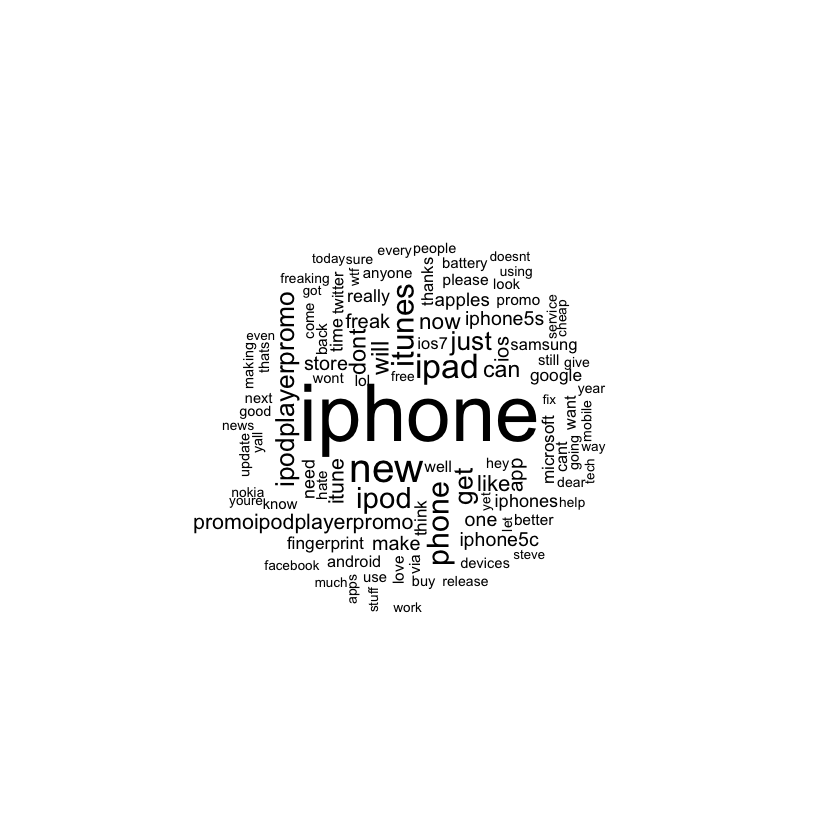

In [25]:
wordcloud(words = colnames(tweetsSparse), 
          freq = colSums(tweetsSparse),
          scale=c(4,.5),
          random.order = FALSE, 
          rot.per=0.3,
          max.words=100)

# Selecting a Color Palette

The use of a palette of colors can often improve the overall effect of a visualization. We can easily select our own colors when plotting; for instance, we could pass c("red", "green", "blue") as the colors parameter to wordcloud(). The RColorBrewer package, which is based on the ColorBrewer project (colorbrewer.org), provides pre-selected palettes that can lead to more visually appealing images. Though these palettes are designed specifically for coloring maps, we can also use them in our word clouds and other visualizations.

Begin by installing and loading the "RColorBrewer" package. This package may have already been installed and loaded when you installed and loaded the "wordcloud" package, in which case you don't need to go through this additional installation step. If you obtain errors (for instance, "Error: lazy-load database 'P' is corrupt") after installing and loading the RColorBrewer package and running some of the commands, try closing and re-opening R.

The function brewer.pal() returns color palettes from the ColorBrewer project when provided with appropriate parameters, and the function display.brewer.all() displays the palettes we can choose from.

Which color palette would be most appropriate for use in a word cloud for which we want to use color to indicate word frequency?



In [26]:
# install.packages("RColorBrewer")
library(RColorBrewer)

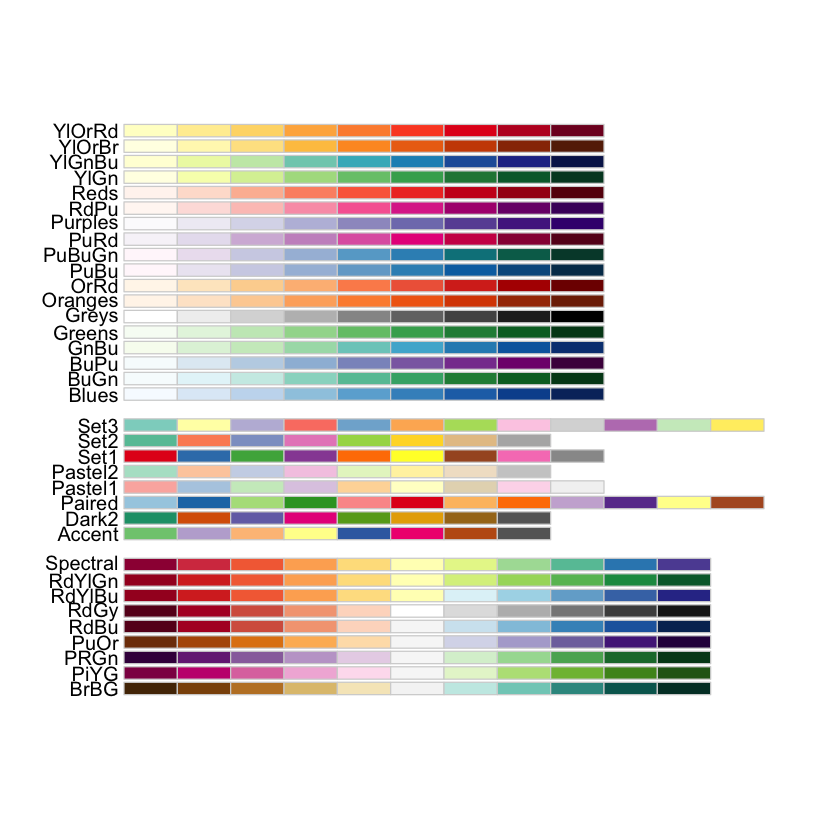

In [27]:
display.brewer.all()

The fourth option limits to elements 5-9, which removes the first four. The second option uses negative indexes, which means remove elements 1-4. The first and third options actually keep colors 1-4, discarding the rest.

A shorthand for this indexing is:

`brewer.pal(9, "Blues")[-1:-4]`

`brewer.pal(9, "Blues")[5:9]`

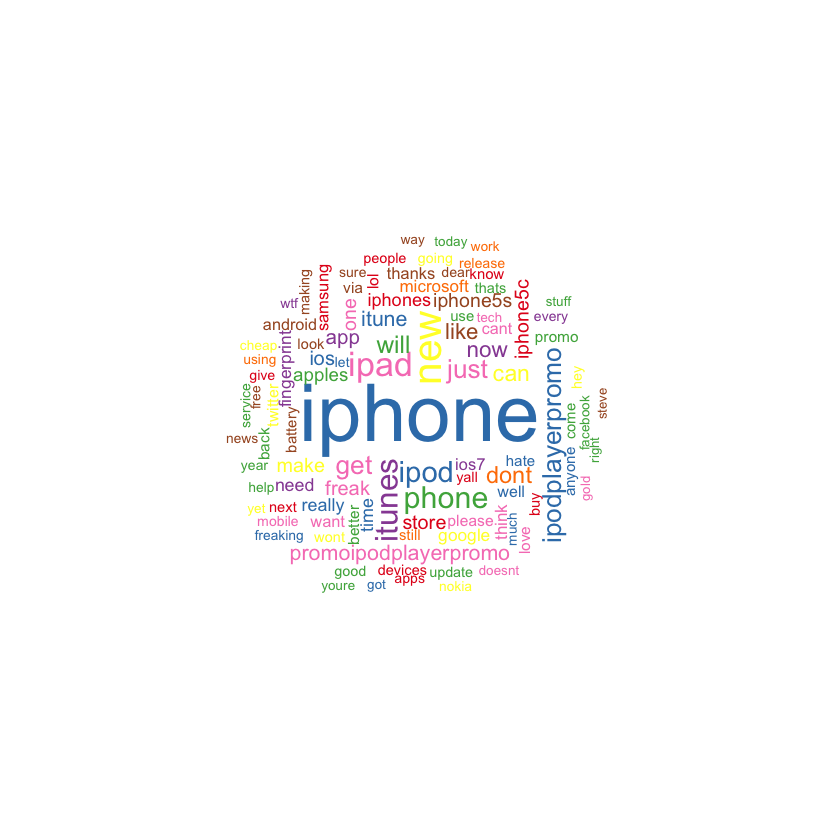

In [46]:
wordcloud(words = colnames(tweetsSparse), 
          freq = colSums(tweetsSparse),
          scale=c(4,.5),
          random.order=FALSE,
          random.color=TRUE, 
          rot.per=0.3,
          max.words=100,
          color = brewer.pal(8,"Set1"))

In [31]:
?brewer.pal

RColorBrewer {RColorBrewer},R Documentation
n,"Number of different colors in the palette, minimum 3, maximum depending on palette"
name,A palette name from the lists below
type,"One of the string ""div"", ""qual"", ""seq"", or ""all"""
select,A list of names of existing palettes
exact.n,"If TRUE, only display palettes with a color number given by n"
colorblindFriendly,"if TRUE, display only colorblind friendly palettes"
Accent,8
Dark2,8
Paired,12
Pastel1,9
